# Regional-k-means

**Authors: [Sergio Rey](https://github.com/sjsrey), [Xin Feng](https://github.com/xf37)**

Regional-k-means is K-means with the constraint that each cluster forms a spatially connected component. The algorithm is developed by [Sergio Rey](https://github.com/sjsrey).

In [1]:
import os
import networkx
import libpysal
import numpy
import geopandas
from collections import defaultdict

import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
import spopt

Create a [spatial weights object](https://pysal.org/libpysal/tutorial.html) for a 10*10 regular lattice. 

In [3]:
dim = 10
w = libpysal.weights.lat2W(dim,dim)
w.n

100

Draw 100 random samples (the given shape is (100, 3)) from a normal (Gaussian) distribution. Then, there are three values for each lattice. They are variables in the dataframe that will be used to measure regional homogeneity.

In [4]:
numpy.random.seed(12345)
data = numpy.random.normal(size=(w.n,3))

In [5]:
data

array([[-2.04707659e-01,  4.78943338e-01, -5.19438715e-01],
       [-5.55730304e-01,  1.96578057e+00,  1.39340583e+00],
       [ 9.29078767e-02,  2.81746153e-01,  7.69022568e-01],
       [ 1.24643474e+00,  1.00718936e+00, -1.29622111e+00],
       [ 2.74991633e-01,  2.28912879e-01,  1.35291684e+00],
       [ 8.86429341e-01, -2.00163731e+00, -3.71842537e-01],
       [ 1.66902531e+00, -4.38569736e-01, -5.39741446e-01],
       [ 4.76985010e-01,  3.24894392e+00, -1.02122752e+00],
       [-5.77087303e-01,  1.24121276e-01,  3.02613562e-01],
       [ 5.23772068e-01,  9.40277775e-04,  1.34380979e+00],
       [-7.13543985e-01, -8.31153539e-01, -2.37023165e+00],
       [-1.86076079e+00, -8.60757398e-01,  5.60145293e-01],
       [-1.26593449e+00,  1.19827125e-01, -1.06351245e+00],
       [ 3.32882716e-01, -2.35941881e+00, -1.99542955e-01],
       [-1.54199553e+00, -9.70735912e-01, -1.30703025e+00],
       [ 2.86349747e-01,  3.77984111e-01, -7.53886535e-01],
       [ 3.31285650e-01,  1.34974221e+00

The neighbors of each lattice can be checked by:

In [6]:
w.neighbors

{0: [10, 1],
 10: [0, 20, 11],
 1: [0, 11, 2],
 11: [1, 10, 21, 12],
 2: [1, 12, 3],
 12: [2, 11, 22, 13],
 3: [2, 13, 4],
 13: [3, 12, 23, 14],
 4: [3, 14, 5],
 14: [4, 13, 24, 15],
 5: [4, 15, 6],
 15: [5, 14, 25, 16],
 6: [5, 16, 7],
 16: [6, 15, 26, 17],
 7: [6, 17, 8],
 17: [7, 16, 27, 18],
 8: [7, 18, 9],
 18: [8, 17, 28, 19],
 9: [8, 19],
 19: [9, 18, 29],
 20: [10, 30, 21],
 21: [11, 20, 31, 22],
 22: [12, 21, 32, 23],
 23: [13, 22, 33, 24],
 24: [14, 23, 34, 25],
 25: [15, 24, 35, 26],
 26: [16, 25, 36, 27],
 27: [17, 26, 37, 28],
 28: [18, 27, 38, 29],
 29: [19, 28, 39],
 30: [20, 40, 31],
 31: [21, 30, 41, 32],
 32: [22, 31, 42, 33],
 33: [23, 32, 43, 34],
 34: [24, 33, 44, 35],
 35: [25, 34, 45, 36],
 36: [26, 35, 46, 37],
 37: [27, 36, 47, 38],
 38: [28, 37, 48, 39],
 39: [29, 38, 49],
 40: [30, 50, 41],
 41: [31, 40, 51, 42],
 42: [32, 41, 52, 43],
 43: [33, 42, 53, 44],
 44: [34, 43, 54, 45],
 45: [35, 44, 55, 46],
 46: [36, 45, 56, 47],
 47: [37, 46, 57, 48],
 48: [38, 

We first explore the simulated data by building a 10*10 lattice shapefile.

In [7]:
libpysal.weights.build_lattice_shapefile(dim, dim, "lattice.shp")

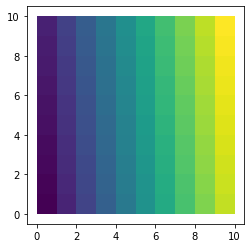

In [8]:
gdf = geopandas.read_file('lattice.shp')
gdf.plot(column='ID')

## Regionalization

With `reg-k-means`, we aggregate 100 simulated lattices into 20 regions.

The model can then be solved:

In [9]:
RKM = spopt.RegionKMeansHeuristic
model = RKM(data, 20, w)
model.solve()

In [10]:
model.labels_

array([12,  3,  3,  3,  3,  3, 19, 19, 17, 11, 12,  9,  9,  7,  7,  2,  2,
        2, 17, 11, 12, 15,  9,  7, 18,  2, 13, 13,  6,  6, 15, 15,  9, 18,
       18,  2, 13, 13,  0,  6, 15,  1,  1, 18, 18, 13, 13, 13,  0,  6,  1,
        1,  4,  4, 18, 18,  0,  0,  0,  0,  1, 16,  4,  4,  4, 10, 10, 14,
        5,  5, 16, 16, 16,  4,  8, 10, 10, 14,  5,  5, 16,  8, 16,  8,  8,
       10, 10, 14,  5, 14,  8,  8,  8,  8,  8, 10, 10, 14, 14, 14])

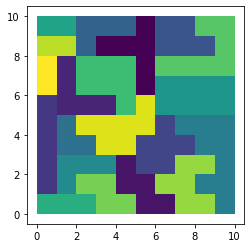

In [11]:
gdf['region'] = model.labels_
gdf.plot(column='region')

The model solution results in 20 spatilly connected regions. We can summarize which lattice belongs to which region:

In [12]:
areas = numpy.arange(dim*dim)
regions = [areas[model.labels_==region] for region in range(20)]

In [13]:
regions

[array([38, 48, 56, 57, 58, 59]),
 array([41, 42, 50, 51, 60]),
 array([15, 16, 17, 25, 35]),
 array([1, 2, 3, 4, 5]),
 array([52, 53, 62, 63, 64, 73]),
 array([68, 69, 78, 79, 88]),
 array([28, 29, 39, 49]),
 array([13, 14, 23]),
 array([74, 81, 83, 84, 90, 91, 92, 93, 94]),
 array([11, 12, 22, 32]),
 array([65, 66, 75, 76, 85, 86, 95, 96]),
 array([ 9, 19]),
 array([ 0, 10, 20]),
 array([26, 27, 36, 37, 45, 46, 47]),
 array([67, 77, 87, 89, 97, 98, 99]),
 array([21, 30, 31, 40]),
 array([61, 70, 71, 72, 80, 82]),
 array([ 8, 18]),
 array([24, 33, 34, 43, 44, 54, 55]),
 array([6, 7])]